## BERTScore

In [ ]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [ ]:
from bert_score import score

In [ ]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

Cloning into 'bert_score'...
remote: Enumerating objects: 997, done.
remote: Counting objects: 100% (359/359), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 997 (delta 220), reused 322 (delta 198), pack-reused 638
Receiving objects: 100% (997/997), 1.34 MiB | 4.22 MiB/s, done.
Resolving deltas: 100% (535/535), done.


Inputs to `score` are a list of candidate sentences and a list of reference sentences.

In [ ]:
with open("/content/generated_original_output.txt") as f:
    generated_text = [line.strip() for line in f]

with open("/content/output_original.txt") as f:
    original_text = [line.strip() for line in f]

In [ ]:
generated_text[0]

'"Panchayat is defined in the Constitution of India as an institution (by whatever name called) of self-government constituted under article 243B for the rural areas."'

In [ ]:
generated_text  ->cands
original_text   ->refs

In [ ]:
P, R, F1 = score(generated_text, original_text, lang="en", verbose=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/2 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 4.21 seconds, 11.88 sentences/sec


In [ ]:
F1

tensor([0.9830, 0.9026, 0.9831, 0.9238, 0.9366, 0.9111, 1.0000, 0.9060, 0.9893,
        0.8661, 0.9260, 0.9003, 0.9354, 0.8726, 0.9760, 0.9712, 1.0000, 0.8759,
        0.8710, 0.9233, 0.8855, 0.8432, 0.9831, 1.0000, 0.9015, 0.8624, 0.8853,
        0.8709, 0.9293, 1.0000, 0.8665, 1.0000, 0.9945, 0.9159, 0.9556, 0.8628,
        0.8556, 0.8809, 0.8473, 1.0000, 0.9894, 0.8676, 0.9893, 0.8360, 0.8880,
        0.9099, 0.8129, 0.9936, 0.9407, 1.0000])

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.924


In [ ]:
print(f"Precision: {P.mean()}")
print(f"Recall: {R.mean()}")
print(f"F1 Score: {F1.mean()}")

Precision: 0.9158849120140076
Recall: 0.9336491227149963
F1 Score: 0.9244198799133301


It might also be very interestig to see the distribution of BERTScore.

In [ ]:
import matplotlib.pyplot as plt

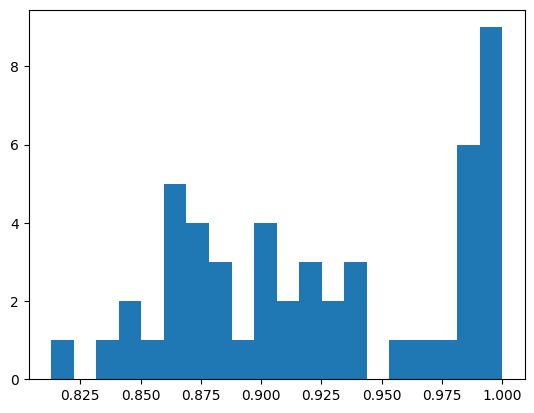

In [ ]:
plt.hist(F1, bins=20)
plt.show()

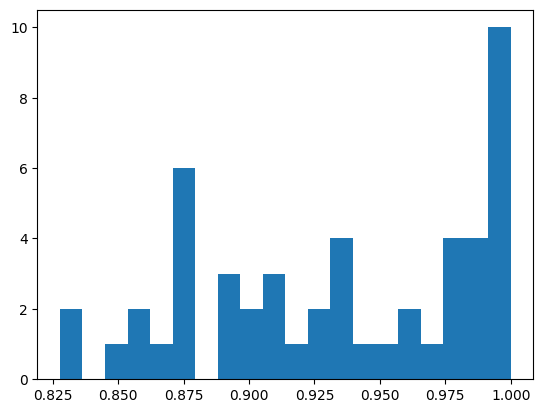

In [ ]:
plt.hist(R, bins=20)
plt.show()

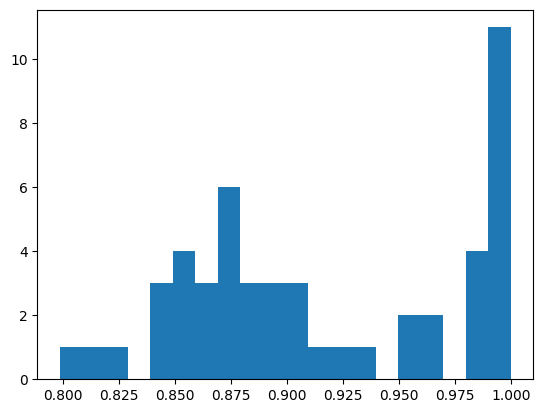

In [ ]:
plt.hist(P, bins=20)
plt.show()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


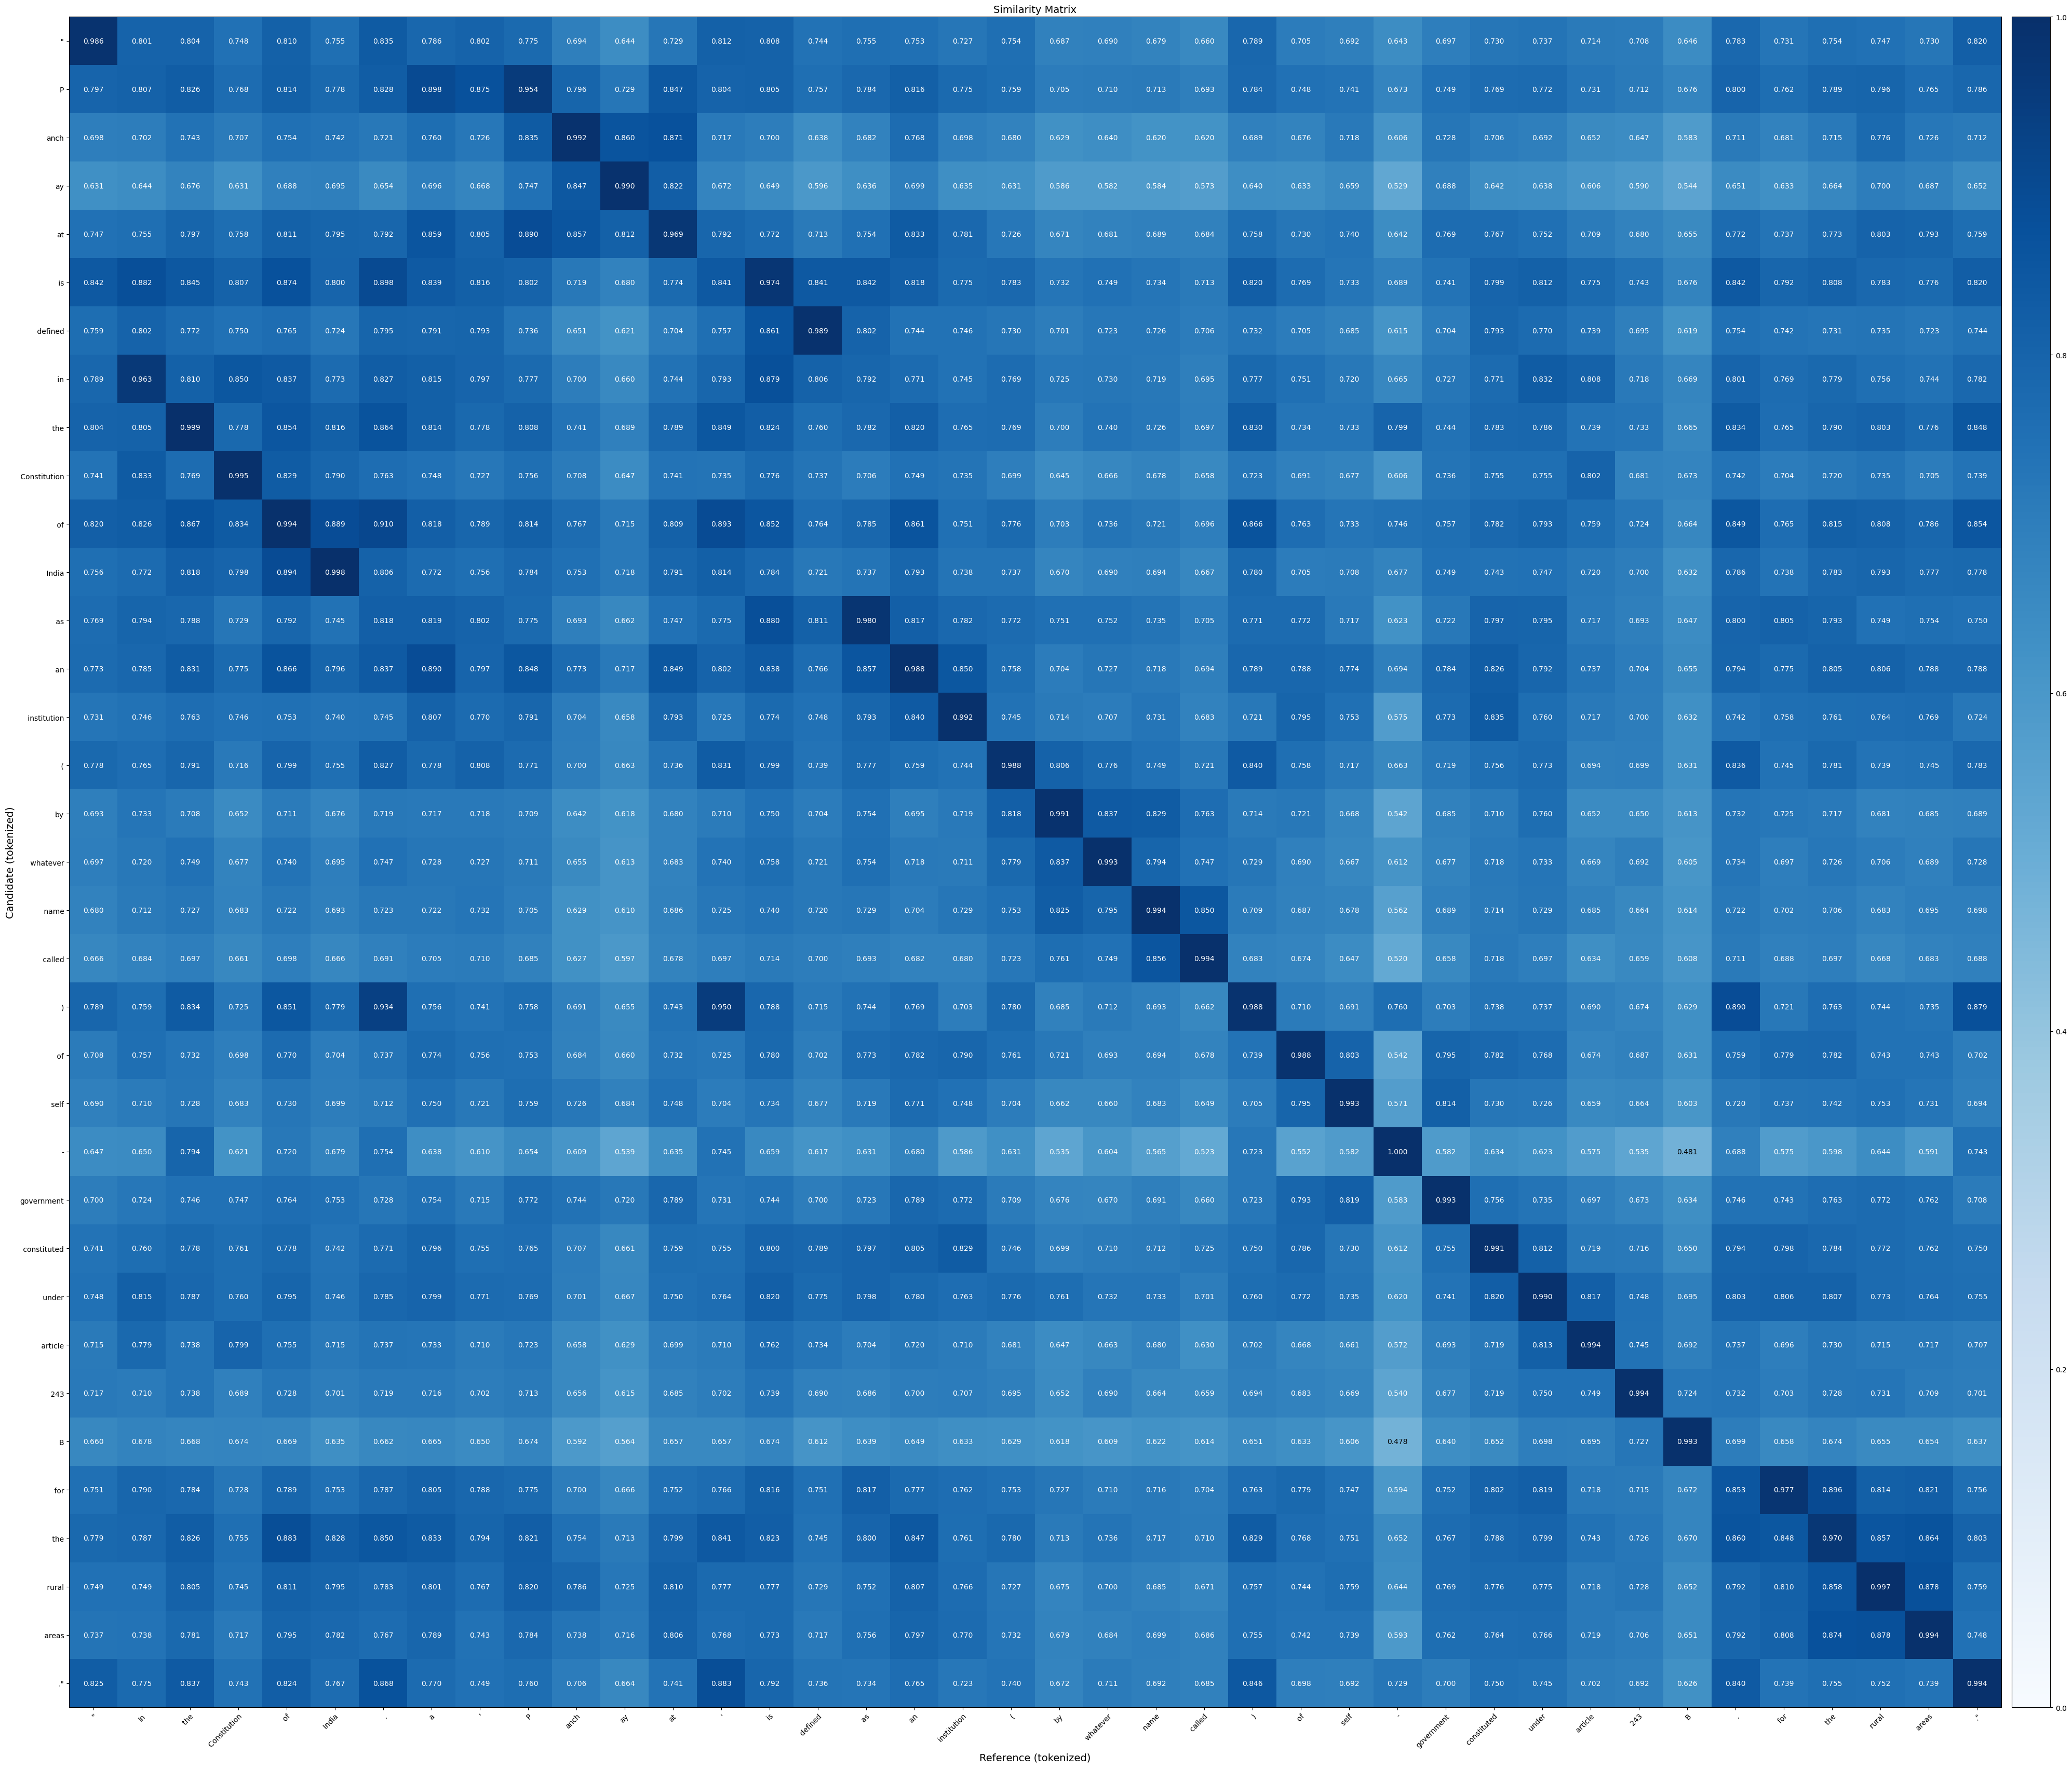

In [ ]:
from bert_score import plot_example

gen_text = generated_text[0]
orig_text = original_text[0]
plot_example(gen_text,orig_text, lang="en")